In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [39]:
df = pd.read_csv('Dataset1.csv', index_col=False)
df.head()

,Outlook,Temp,Humidity,Wind,Play
0,R,H,Normal,F,N
1,R,H,High,T,N
2,O,H,Normal,F,Y
3,S,M,Normal,F,Y
4,S,C,Normal,F,Y


#### Rainy->1 Overcast->0 Sunny->2
#### High->1 Medium->2 Cold->0
#### Low->1 Normal->2 High->0
#### Windy->1 Not Windy->0


In [40]:
encoder = LabelEncoder()
df_encoded = pd.DataFrame()

# Here we need to encode all the labels because each are non numeric features
for col in df.columns:
  df_encoded["Label_"+col] = encoder.fit_transform(df[col])


#Task 1: Try the algo on Dataset1 - LabelEncoding of features:


In [41]:
df_encoded.head()

,Label_Outlook,Label_Temp,Label_Humidity,Label_Wind,Label_Play
0,1,1,2,0,0
1,1,1,0,1,0
2,0,1,2,0,1
3,2,2,2,0,1
4,2,0,2,0,1


# #Task 1: Train test Division 80%-20%
# Random state is equal to roll no

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop("Label_Play",axis=1),df_encoded["Label_Play"],test_size=0.20, random_state=47)

In [43]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [44]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
target_pred = gnb.predict(X_test)


In [45]:
print(gnb.score(X_test, y_test))


0.6666666666666666


In [46]:
print(target_pred, y_test)
# From the above score we can say that 66.7% testing accuracy is correct
# As the model predicted 2 correct labels and falsely classified one 0 to 1.


[1 1 1] [1 0 1]


In [47]:
cm = confusion_matrix(y_test, target_pred)


<AxesSubplot:>

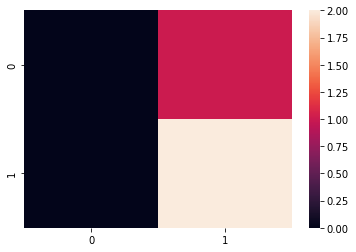

In [48]:
sns.heatmap(cm)


In [49]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, target_pred, average=None, zero_division=0)
recall = recall_score(y_test, target_pred, average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))


precision: [0.         0.66666667]
recall: [0. 1.]


# => Task - 1

In [50]:
pred_1 = [[1,2,2,0]]
pred_2 = [[2,0,0,1]]

#### (1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?

In [52]:
print(gnb.predict(pred_1))  # We get output as 0 hence answer is no

[0]


#### (2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’,and Wind = ’True’?¶


In [51]:
print(gnb.predict(pred_2))  # We get output as 1 hence answer is yes


[1]


#### (3) Accuracy , precision and recall of both Models?¶


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, target_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



# => Task - 2

In [54]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
X = cancer.data
df = pd.DataFrame(X)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
targets = cancer.target
X_train, X_test, y_train, y_test = train_test_split(df.to_numpy(),targets,test_size=0.40, random_state=31)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((341, 30), (228, 30), (341,), (228,))

In [58]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)*100 


92.54385964912281

<AxesSubplot:>

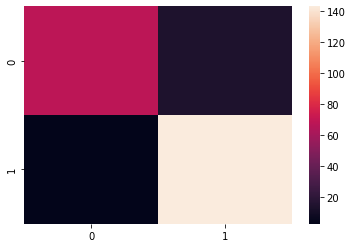

In [59]:
predicted_label = gnb.predict(X_test)
cm = confusion_matrix(y_test, predicted_label)
sns.heatmap(cm)


In [60]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, predicted_label,
                            average=None, zero_division=0)
recall = recall_score(y_test, predicted_label, average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))


precision: [0.95774648 0.91082803]
recall: [0.82926829 0.97945205]
